<a href="https://colab.research.google.com/github/ValinStudent/CSC-481-Spring25/blob/main/Python_Mobile_Pathplanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python_motion_Planning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 2.2 MB/s eta 0:00:00


iteration 0: best fitness = 1.9951801718579374
iteration 1: best fitness = 732.2399778824855
iteration 2: best fitness = 742.4896821544339
iteration 3: best fitness = 859.3116064795317
iteration 4: best fitness = 876.4027048284739
iteration 5: best fitness = 879.4624666209008
iteration 6: best fitness = 885.5302934959607
iteration 7: best fitness = 885.5302934959607
iteration 8: best fitness = 885.5302934959607
iteration 9: best fitness = 888.9552518821414
iteration 10: best fitness = 897.6570488789973
iteration 11: best fitness = 897.9435709512949
iteration 12: best fitness = 897.9435709512949
iteration 13: best fitness = 902.9915124949241
iteration 14: best fitness = 902.9915124949241
iteration 15: best fitness = 905.0089651557721
iteration 16: best fitness = 905.0089651557721
iteration 17: best fitness = 908.621924078095
iteration 18: best fitness = 910.4235905718396
iteration 19: best fitness = 913.648791909341
iteration 20: best fitness = 913.648791909341
iteration 21: best fitnes

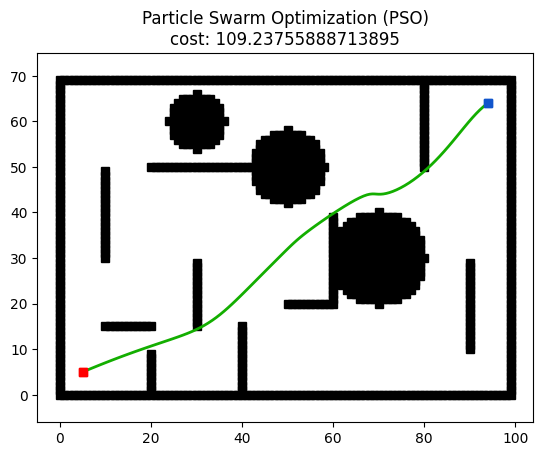

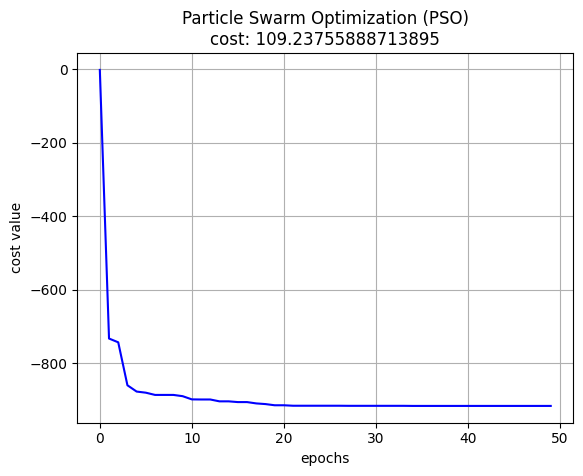

Time taken:  45.43330240249634


In [4]:
"""
@file: global_examples.py
@breif: global planner application examples
@author: Yang Haodong, Wu Maojia
@update: 2024.11.22
"""
import sys, os,time
from python_motion_planning.utils import Grid, Map, SearchFactory

if __name__ == '__main__':
    '''
    path searcher constructor
    '''
    search_factory = SearchFactory()

    '''
    graph search
    '''
    # build environment
    start = (5, 5)
    goal = (94, 64)
    env = Grid(100, 70)
    obstacles = env.obstacles

# Adding walls
    for i in range(10, 21):
        obstacles.add((i, 15))
    for i in range(10):
        obstacles.add((20, i))
    for i in range(15, 30):
        obstacles.add((30, i))
    for i in range(16):
        obstacles.add((40, i))
    for i in range(50, 60):
        obstacles.add((i, 20))
    for i in range(20, 40):
        obstacles.add((60, i))
    for i in range(50, 70):
        obstacles.add((80, i))
    for i in range(20, 50):
        obstacles.add((i, 50))
    for i in range(10, 30):
        obstacles.add((90, i))
    for i in range(30, 50):
        obstacles.add((10, i))

    # Adding large round obstacles
    def add_circle_obstacle(center, radius):
        cx, cy = center
        for x in range(cx - radius, cx + radius + 1):
            for y in range(cy - radius, cy + radius + 1):
                if (x - cx) ** 2 + (y - cy) ** 2 <= radius ** 2:
                    obstacles.add((x, y))

    add_circle_obstacle((50, 50), 8)  # Large circle at (50, 50) with radius 8
    add_circle_obstacle((30, 60), 6)  # Large circle at (30, 60) with radius 6
    add_circle_obstacle((70, 30), 10) # Large circle at (70, 30) with radius 10
    env.update(obstacles)

    # create planner #Uncomment the planner you want to use
    #planner = search_factory("a_star", start=start, goal=goal, env=env)
    #planner = search_factory("dijkstra", start=start, goal=goal, env=env)
    planner = search_factory("pso", start=start, goal=goal, env=env, max_iter=50,n_particles=50, point_num=10,max_speed=3, w_cognitive=1.8, w_social=1.5, w_inertial=0.5)

    start_time = time.time()
    planner.run()
    end_time = time.time()
    print("Time taken: ", end_time - start_time)


Take note that when the image is small, it appears that the lines go throgh corners, but it is because of how it is rendered. If a larger image is produced it looks correct.